<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%B8_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%C2%BB_%D0%BE%D0%B1%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d  # noqa: F401
from pandas import DataFrame
from sklearn import datasets
iris =datasets.load_iris()
from sklearn.model_selection import train_test_split
import time

In [ ]:
classes=iris.target_names
classes # значения таргетных перменных

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Подгружаем в Pandas, фильтруем данные ,оставляя только 2 класса

In [ ]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_b=data1.loc[iris['target']!=0.0]
iris_b.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X = iris_b[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']] # забираем данные из датасета
Y = iris_b[['target']]
X.index = np.arange(0, len(X))#Перенумеровываем с 0
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5
...,...,...,...,...
95,6.7,3.0,5.2,2.3
96,6.3,2.5,5.0,1.9
97,6.5,3.0,5.2,2.0
98,6.2,3.4,5.4,2.3


In [ ]:
Xarr=X.to_numpy()
Xarr[1]

array([6.4, 3.2, 4.5, 1.5])

In [ ]:
len(Xarr) #Проверяем, что двухмерные массивы для нашей задачи пойдут, и len (X) будет не 400, а 100

100

In [ ]:
Y.index = np.arange(0, len(Y))#Перенумеровываем с 0
Yarr=Y['target'].to_numpy()-1 #Перенумеровываем на 0 и 1 класс
Yarr[1]

0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xarr, Yarr, test_size=0.2, random_state=21) #20% на тестовое
#X_train.index=np.arange(0, len(X_train))#
#y_train.index=X_train.index
#X_test.index=np.arrange(0,len(X_test))
#y_test.index=X_test.index
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [7.9, 3.8, 6.4, 2. ],
       [7.7, 3. , 6.1, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.9, 4.2, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [5.9, 3. , 4.2, 1.5],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3. , 5.5, 1.8],
       [6.1, 2.9, 4.7, 1.4],
       [5. , 2. , 3.5, 1. ],
       [7.7, 2.6, 6.9, 2.3],
       [6.7, 3. , 5. , 1.7],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 3.4, 5.6, 2.4],
       [5.5, 2.6, 4.4, 1.2]])

In [ ]:
EPOCHS = 1300
LEARNING_RATE = 0.05

Добавим функцию сигмоида для предсказаний классов

In [ ]:
def _sigmoid( x):
    return _sigmoid_function(x);

def _sigmoid_function( x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)

In [ ]:
def cost_function(X, y, theta0, thetas): #Функция потерь (Бинарная кросс энтропия)

  total_cost = 0
  for i in range(len(X)):
      y_c = theta0 + np.sum(thetas * X[i])
      y_pred=_sigmoid(y_c)
      total_cost += ( y_pred-y[i]) ** 2
  return total_cost/2*len(X)

In [ ]:
def der_theta0(X, y, theta0, thetas):  # Первый (свободный) вес
    total_cost = 0
    for i in range(len(X)):
        pred = _sigmoid(theta0 + np.sum(thetas * X[i]))
        total_cost += (pred - y[i]) * 1
    return total_cost / len(X)

In [ ]:
def der_thetax(X, y, theta0, thetas,k): #Остальные веса
    total_cost = 0
    for i in range(len(X)):
        pred = _sigmoid(theta0 + np.sum(thetas * X[i]))
        total_cost +=  (pred - y[i]) * X[i][k]
    return total_cost / (len(X))

# Решение методом градиентного спуска

In [ ]:
theta0=1
uX=X_train
uY=y_train
thetas=[1,1,1,1]
dt=[0,0,0,0]
theta0_arr=[];
theta_arr=[];
cost_arr=[]
st = time.time()
for step in range(EPOCHS):

    dt0 = der_theta0(uX, uY, theta0, thetas)
    #print("dt0:",dt0)
    for j in range(0,len(thetas)):
      dt[j] = der_thetax(uX, uY, theta0, thetas,j)
      #print("dt",j,":",dt[j])
      thetas[j]=thetas[j]-LEARNING_RATE * dt[j]
    theta0 = theta0 - LEARNING_RATE * dt0
    cost=cost_function(uX, uY, theta0, thetas)
    if ((step+1)%100==0 or step==0):
      print("step:",step+1," t0:", theta0, "other thetas:", thetas, "cost:", cost)
    theta0_arr.append(theta0)
    theta_arr.append(thetas)
    cost_arr.append(cost)
et = time.time()
gd_time=et-st

step: 1  t0: 0.9762500137492874 other thetas: [0.8586875743666169, 0.9339375750612415, 0.8996876316619786, 0.9685625617444559] cost: 1519.9936760961143
step: 100  t0: 0.5930526493446799 other thetas: [-0.8640620638085091, 0.0956482305124473, 0.6231506790573738, 1.031493263312413] cost: 486.7495690123743
step: 200  t0: 0.44892225695024607 other thetas: [-1.194462236417762, -0.14373729151584544, 1.115644464406312, 1.315418155903088] cost: 361.71267104908503
step: 300  t0: 0.3308472120674814 other thetas: [-1.4421739898504402, -0.3460885051487187, 1.494325333140055, 1.5470032578243236] cost: 291.9184798318978
step: 400  t0: 0.23042749101630788 other thetas: [-1.6366259501692713, -0.5210706149325796, 1.7978372952799004, 1.7431822303836324] cost: 249.04945018621225
step: 500  t0: 0.14254131747821974 other thetas: [-1.79493151230006, -0.6752711937965323, 2.049310875266251, 1.9140319200036717] cost: 220.52447085394493
step: 600  t0: 0.06395469949566218 other thetas: [-1.9274702619314028, -0.8

In [ ]:
gd_time

10.6585533618927

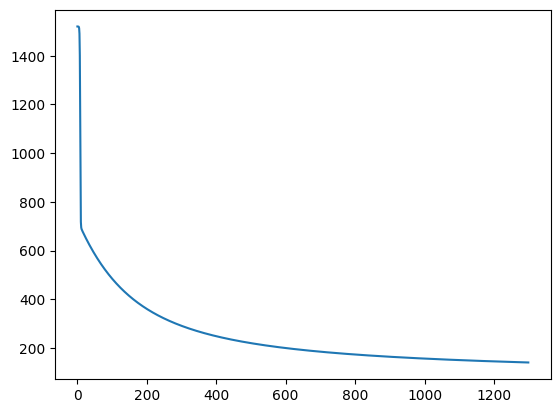

In [ ]:
#Нарисуем график изменения MSE в зависимости от времени
plt.plot(range(EPOCHS),cost_arr)
plt.show()

In [ ]:



def predict( x,thetas,theta0):
    x_dot_weights = np.matmul(x, thetas.transpose()) + theta0
    #print(x_dot_weights)
    probabilities = _sigmoid(x_dot_weights)
    #print(probabilities)
    result_class=(1 if probabilities > 0.5 else 0);
    return result_class

In [ ]:
Yarr[33]

0.0

In [ ]:
predict(Xarr[33],np.array(theta_arr[-1]),theta0_arr[-1])

1

In [ ]:
predictions_arr_test=[]
predictions_arr_train=[]
for item in X_test:
  predictions_arr_test.append(predict(item,np.array(theta_arr[-1]),theta0_arr[-1])*1.0)
for item in X_train:
  predictions_arr_train.append(predict(item,np.array(theta_arr[-1]),theta0_arr[-1])*1.0)
#BinaryCrossEntropy(Yarr,predictions_arr)

total_train=0
for key in range(len(predictions_arr_train)):
  if predictions_arr_train[key]==y_train[key]:
      total_train+=1
total_train


78

In [ ]:
total_test=0
for key in range(len(predictions_arr_test)):
  if predictions_arr_test[key]==y_test[key]:
      total_test+=1
total_test

18

In [ ]:
#Посчитаем accuracy:
gd_acc=total_test/len(X_test);
print("train:",total_train/len(X_train))
print("test:",gd_acc)

train: 0.975
test: 0.9


#Решение методом стохастического градиентного спуска

Будем брать градиентный спуск от одного элемента, в остальном особо менять алгоритм не будем

In [ ]:
def scost_function(x, y, theta0, thetas): #Функция потерь (Бинарная кросс энтропия)

  y_c = theta0 + np.sum(thetas * x)
  y_pred=_sigmoid(y_c)
  total_cost = ( y_pred-y) ** 2
  return total_cost/2

In [ ]:
def sder_theta0(x, y, theta0, thetas):  # Первый (свободный) вес
    pred = _sigmoid(theta0 + np.sum(thetas * x))
    return (pred - y) * 1


In [ ]:
def sder_thetax(x, y, theta0, thetas,k): #Остальные веса
        pred = _sigmoid(theta0 + np.sum(thetas * x))
        return (pred - y) * x[k]

In [ ]:

X_train

array([[5.6, 2.5, 3.9, 1.1],
       [6.4, 3.2, 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [5.7, 2.6, 3.5, 1. ],
       [5.7, 2.8, 4.1, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [6.7, 2.5, 5.8, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [6.1, 2.8, 4. , 1.3],
       [6.9, 3.1, 5.4, 2.1],
       [6.2, 3.4, 5.4, 2.3],
       [6.7, 3.1, 5.6, 2.4],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.4, 3.2, 5.3, 2.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.4, 2.9, 4.3, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.5, 2.5, 4. , 1.3],
       [6.6, 2.9, 4.6, 1.3],
       [5.6, 2.8, 4.9, 2. ],
       [4.9, 2.4, 3.3, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [6. , 2.2, 5. , 1.5],
       [7.1, 3. , 5.9, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 2.8, 4.8, 1.4],
       [5.8, 2.7, 3.9, 1.2],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 3. , 4.1, 1.3],
       [6. , 3

In [ ]:
import random
theta0=1
uX=X_train
uY=y_train
thetas=[1,1,1,1]
dt=[0,0,0,0]
stheta0_arr=[];
stheta_arr=[];
scost_arr=[]
st = time.time()
for step in range(EPOCHS):
    random.seed(step)
    ri=random.randint(0,len(uX)-1)
    target_x=uX[ri]
    target_y=uY[ri]

    dt0 = sder_theta0(target_x, target_y, theta0, thetas)

    for j in range(0,len(thetas)):
      dt[j] = sder_thetax(target_x, target_y, theta0, thetas,j)
      thetas[j]=thetas[j]-LEARNING_RATE * dt[j]
    theta0 = theta0 - LEARNING_RATE * dt0
    cost=cost_function(uX, uY, theta0, thetas)
    if ((step+1)%100==0 or step==0):
      print("step:",step+1," t0:", theta0, "other thetas:", thetas, "cost:", cost)
    stheta0_arr.append(theta0)
    stheta_arr.append(thetas)
    scost_arr.append(cost)
et = time.time()
sgd_time = et-st

step: 1  t0: 0.9500000030880305 other thetas: [0.6650000206898041, 0.8450000903268676, 0.7800002072937239, 0.9300001736430905] cost: 1519.9616957138073
step: 100  t0: 0.6425290553245153 other thetas: [-0.7110996424442861, 0.03314299272652518, 0.012558449516807887, 0.7421169426920979] cost: 1391.7203721367514
step: 200  t0: 0.5867017455166823 other thetas: [-0.4491338876546824, -0.14581944497059166, 0.30346949335288464, 0.8372952358429577] cost: 571.3041863745884
step: 300  t0: 0.4447654239361155 other thetas: [-0.6163284288395234, -0.37677587542396945, 0.48955149247973995, 0.9145355714883109] cost: 613.2889516196162
step: 400  t0: 0.30724721173849157 other thetas: [-0.5841524462892921, -0.7268025031988183, 0.46802626072048864, 0.8894125737478484] cost: 1045.3051384150579
step: 500  t0: 0.20514444847647045 other thetas: [-0.6650847138275073, -0.9638259336853614, 0.7133014189444339, 1.016781328162706] cost: 918.4265193842061
step: 600  t0: 0.14291489040078034 other thetas: [-0.5168512501

In [ ]:
sgd_time

2.2163541316986084

Нарисуем график

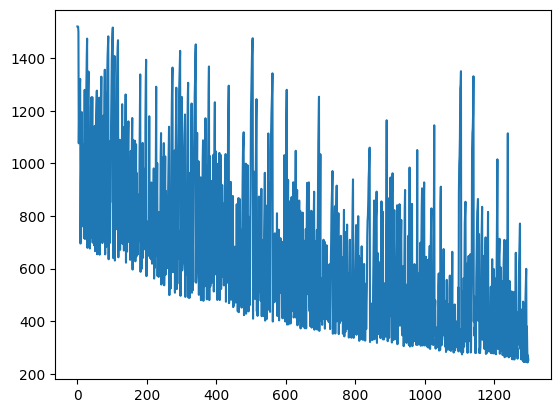

In [ ]:
#Нарисуем график изменения MSE в зависимости от времени
plt.plot(range(EPOCHS),scost_arr)
plt.show()

In [ ]:
spredictions_arr_test=[]
spredictions_arr_train=[]
for item in X_test:
  spredictions_arr_test.append(predict(item,np.array(stheta_arr[-1]),stheta0_arr[-1])*1.0)
for item in X_train:
  spredictions_arr_train.append(predict(item,np.array(stheta_arr[-1]),stheta0_arr[-1])*1.0)
#BinaryCrossEntropy(Yarr,predictions_arr)

total_train=0
for key in range(len(predictions_arr_train)):
  if spredictions_arr_train[key]==y_train[key]:
      total_train+=1
print("total train:",total_train)
total_test=0
for key in range(len(predictions_arr_test)):
  if spredictions_arr_test[key]==y_test[key]:
      total_test+=1
print("total test:",total_test)


total train: 76
total test: 18


In [ ]:
#Посчитаем accuracy:
sgd_acc=total_test/len(X_test);
print("train:",total_train/len(X_train))
print("test:",sgd_acc)

train: 0.95
test: 0.9


# Решение с оптимизацией RMSProp

In [ ]:
def spd_theta0(x, y, theta0, thetas,spd_theta0,grad_theta0):  # Скорость изменения свободного веса
    pred = _sigmoid(theta0 + np.sum(thetas * x))
    return pred * spd_theta0 + (1 - pred) * np.square(grad_theta0)

def spd_thetax(x, y, theta0, thetas,k,spd_theta,grad_theta): #Скорость изменения остальных весов
    pred = _sigmoid(theta0 + np.sum(thetas * x))
    return pred * spd_theta + (1 - pred) * np.square(grad_theta)


In [ ]:
import random
theta0=1
uX=X_train
uY=y_train
thetas=[1,1,1,1]
dt=[0,0,0,0]
sthetas=[0,0,0,0]
stheta0=0
rtheta0_arr=[];
rtheta_arr=[];
rcost_arr=[]
st=time.time()
for step in range(EPOCHS):
    random.seed(step)
    ri=random.randint(0,len(uX)-1)
    target_x=uX[ri]
    target_y=uY[ri]

    stheta0=spd_theta0(target_x,target_y,theta0,thetas,stheta0,dt0)
    dt0 = sder_theta0(target_x, target_y, theta0, thetas)


    for j in range(0,len(thetas)):
      sthetas[j]=spd_thetax(target_x,target_y,theta0,thetas,j,sthetas[j],dt[j])
      dt[j] = sder_thetax(target_x, target_y, theta0, thetas,j)

      thetas[j]=thetas[j]-LEARNING_RATE * dt[j] / (np.sqrt( sthetas[j]  )+ pow(10,-4))

    theta0 = theta0 - LEARNING_RATE * dt0 / (np.sqrt(stheta0  )+ pow(10,-4))
    cost=cost_function(uX, uY, theta0, thetas)
    if ((step+1)%100==0 or step==0):
      print("step:",step+1," t0:", theta0, "other thetas:", thetas, "cost:", cost," spd_theta0:",stheta0," spd_thetas:",sthetas)
    rtheta0_arr.append(theta0)
    rtheta_arr.append(thetas)
    rcost_arr.append(cost)
et=time.time()
rgd_time=et-st

step: 1  t0: -341.67068513616863 other thetas: [-3348.9997931019584, 1.0, 1.0, 1.0] cost: 1680.0  spd_theta0: 2.1079738863485773e-09  spd_thetas: [0.0, 0.0, 0.0, 0.0]
step: 100  t0: -1341.4207101223014 other thetas: [-6698.6918564091975, 4551.02317685614, 2251.2500506414362, -48.825775276135346] cost: 1680.0  spd_theta0: 0.0  spd_thetas: [0.0, 0.0, 0.0, 0.0]
step: 200  t0: -2841.270715212805 other thetas: [-13798.510267856433, 7551.081937177007, 14001.250098221099, -48.825757366431944] cost: 440.0  spd_theta0: 0.0  spd_thetas: [0.0, 0.0, 0.0, 0.0]
step: 300  t0: -5341.070735210806 other thetas: [-24348.285442480934, 10501.081937177007, 24301.2500982211, -48.825757366431944] cost: 840.0  spd_theta0: 0.0  spd_thetas: [0.0, 0.0, 0.0, 0.0]
step: 400  t0: -6341.020740210306 other thetas: [-27898.209738644044, 7951.133787108491, 28001.2500982211, -48.825757366431944] cost: 1560.0  spd_theta0: 1.0  spd_thetas: [36.0, 0.0, 0.0, 0.0]
step: 500  t0: -6340.870755208807 other thetas: [-25198.02000

In [ ]:
rgd_time

2.6636126041412354

In [ ]:
thetas

[-25497.703323915077, 9301.196293821435, 30202.255829783004, 2301.224237587213]

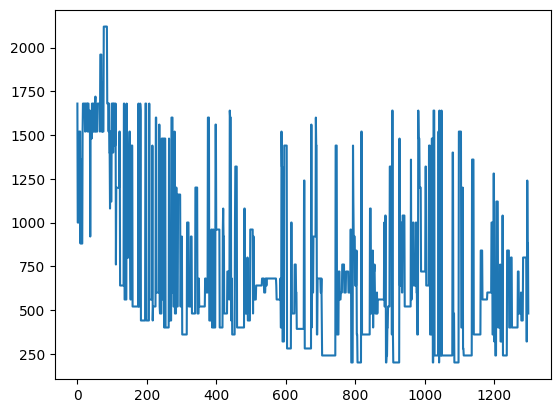

In [ ]:
#Нарисуем график изменения MSE в зависимости от времени
plt.plot(range(EPOCHS),rcost_arr)
plt.show()

In [ ]:
rpredictions_arr_test=[]
rpredictions_arr_train=[]
for item in X_test:
  rpredictions_arr_test.append(predict(item,np.array(rtheta_arr[-1]),rtheta0_arr[-1])*1.0)
for item in X_train:
  rpredictions_arr_train.append(predict(item,np.array(rtheta_arr[-1]),rtheta0_arr[-1])*1.0)
#BinaryCrossEntropy(Yarr,predictions_arr)

total_train=0
for key in range(len(predictions_arr_train)):
  if rpredictions_arr_train[key]==y_train[key]:
      total_train+=1
print("total train:",total_train)
total_test=0
for key in range(len(predictions_arr_test)):
  if rpredictions_arr_test[key]==y_test[key]:
      total_test+=1
print("total test:",total_test)


total train: 68
total test: 13


In [ ]:
#Посчитаем accuracy:
r_acc_test=total_test/len(X_test)
print("train:",total_train/len(X_train))
print("test:",r_acc_test)

train: 0.85
test: 0.65


Попробуем решить ту же задачу через Логистическую регрессию чтобы проверить точность

In [ ]:

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=EPOCHS)


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21) #20% на тестовое
#X_test.index

In [ ]:
# обучаем на части датасета (train)
st=time.time()
model.fit(X_train, y_train)
et=time.time()
sc_time=et-st
predictions = model.predict(X_test)
sc_time

0.0190579891204834

In [ ]:
X_test[:5]

array([[6.1, 2.8, 4.7, 1.2],
       [7.9, 3.8, 6.4, 2. ],
       [7.7, 3. , 6.1, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [6.8, 3. , 5.5, 2.1]])

In [ ]:
y_test[:5]

array([0., 1., 1., 0., 1.])

In [ ]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0., 1., 1., 0., 1.])

In [ ]:
model.score(X_train, y_train)

0.9625

In [ ]:
model.coef_ # Получившиеся веса

array([[-0.34138986, -0.57482631,  2.797087  ,  2.15501171]])

In [ ]:
model.intercept_

array([-13.31435521])

# Таблица результатов

In [ ]:
DataFrame([["GD",gd_acc,gd_time],["SGD",sgd_acc,sgd_time],["RMSProp",r_acc_test,rgd_time]], columns=["Type","Accuracy","Time"])

,Type,Accuracy,Time
0,GD,0.90,10.658553
1,SGD,0.90,2.216354
2,RMSProp,0.65,2.663613


# Вывод

Градиентный спуск позволяет найти локальный минимум функции, но с увеличением объема данных, работает все медленее и медленне, т.к. происходит перебор по всем строкам.
Стохастический градиентный спуск позволяет значительно его ускорить, т.к. мы перебираем случайные пакеты данных, но может приводить к большей ошибке (падает точность).
Методы оптимизации SGD позволяют ускорить его схождение, но опять же точность может упасть.